## New York Taxi Fare Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


The above cell represents the required file that helpfull for computation is importted

In [2]:
# Reading the file

data = pd.read_csv('taxifare.csv', parse_dates = ['pickup_datetime'])
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2


The processing file was read successfully and it was displayed. Each column contain specfic data's 

##### Fare_amount - represents the total amount to be paid after the completion of ride

##### Pickup_datetime - gives the exact time and date of the pickup or the starting of ride according to UTC

##### pickup_longitude , pickup_latitude - this exactly means that gives the precise location of pickup location's latitude and longitude

##### dropoff_longitude, dropoff_latitude - this represents dropped location's latitude and longitude

##### passenger_count -  gives the details of how many peoples were travelled while in the ride

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


The information summary of the entire dataset is printed, from the above cell may conculde the perfection of data by understanding the null values and types of each columns and can also know about the entire size with the help of "RangeIndex"

In [4]:
data['fare_amount'] = data['fare_amount'].astype(int)
data['fare_amount']

0         4
1        16
2         5
3         7
4         5
         ..
49995    15
49996     7
49997     6
49998     4
49999    10
Name: fare_amount, Length: 50000, dtype: int32

In [5]:
print('Skewness : ', data['fare_amount'].skew())
print('Kurtosis: ', data['fare_amount'].kurt())

Skewness :  3.5545489711334124
Kurtosis:  22.554174971688138


C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

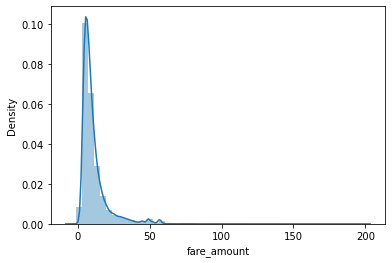

In [6]:
sns.distplot(data['fare_amount'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 10.968780, Sigma = 9.70



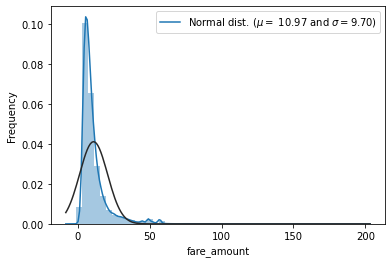

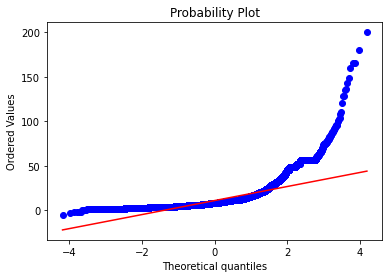

In [7]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data['fare_amount'], fit = norm);
(mu,sigma) = norm.fit(data['fare_amount'])

print('\n mu = {:2f}, Sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma = ${:.2f})'.format(mu, sigma)], 
           loc = 'best')

plt.ylabel('Frequency');

#qq plot
fig = plt.figure()
res = stats.probplot(data['fare_amount'], plot = plt)
plt.show()

The type of column "Fare_amount" is converted into int from float. And this changes was made permanently by passing it into original dataframe

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  int32              
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int32(1), int64(1), object(1)
memory usage: 2.9+ MB


In [9]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,10.96878,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.69772,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.00000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.00000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.00000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.00000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.00000,40.783472,401.083332,40.851027,43.415190,6.000000


Describe function return the min and max values as well as quartiles, mean, standard deviation and counts as basic piece of inforamtion about the statistics of the given dataframe

In [10]:
data.shape

(50000, 8)

Shape Function represents numbers of counts accordingly rows and columns

In [11]:
# Converting the dates and times to seperate columns

rng = pd.DataFrame()
rng['datetime'] = pd.to_datetime(data['pickup_datetime'], errors= 'coerce')

rng was assigned to an empty dataframe because I like to have the final output to be a dataframe.

Then the datetime column of the dataframe is passed and it was converting to Datetime64[ns, UTC] type of data, changes was made permanently,
if something was given as errors, it can automatically coerce the value to Datetime64

In [12]:
# Splits the whole columns accordingly 

rng = {
    "year" : rng['datetime'].dt.year ,
    "month" : rng['datetime'].dt.month ,
    "date" : rng['datetime'].dt.day,
    "hour" : rng['datetime'].dt.hour , 
    "minute" : rng['datetime'].dt.minute
}

rng was assigned as dictinoary of values with dedicated columns for year, month, day, hour, minute

In [13]:
# Convert the dictinoary of datetime columns to dataframe

df = pd.DataFrame.from_dict(rng)
df

,year,month,date,hour,minute
0,2009,6,15,17,26
1,2010,1,5,16,52
2,2011,8,18,0,35
3,2012,4,21,4,30
4,2010,3,9,7,51
...,...,...,...,...,...
49995,2013,6,12,23,25
49996,2015,6,22,17,19
49997,2011,1,30,4,53
49998,2012,11,6,7,9


rng was converting to dataframe and saved in the variable 'df'

In [14]:
# Merging dataframes of original dataset with the converted time and date dataframe

data = data.join(df, lsuffix = '_left' , rsuffix = '_right' )

This above code represents that the original dataframe and the created 'df' was joined together to easy understanding for machine


By this Data Preparation was completed, all the columns are numeric so it can do nothing with encoder, as well as non-null values in the dataframe so no need of imputation.

Then hereby the Preprocessing was started

In [15]:
# Train Test Split model

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 42)

The entire dataframe was split according to train, test data. Generally the piece was data was sliced into two pieces by test and train, everytime when the data was splitted  the train contains lot of information of 80% and the test may contain 20%. it was general rule to have bigger train data for grasping the best result

In [16]:
print('Training dataset shape: ', train_df.shape)
print('Test dataset shape: ', test_df.shape)

Training dataset shape:  (40000, 13)
Test dataset shape:  (10000, 13)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  int32              
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
 8   year               50000 non-null  int64              
 9   month              50000 non-null  int64              
 10  date               50000 non-null  int64              
 11  hour               50000 non-null  int64              
 12  minute             50000 non-null  int64      

In [18]:
# Assiginig what are all the input columns and Output columns or Targetted columns

input_cols= list(train_df.columns)[3:13]
target_cols = 'fare_amount'

This above cell splits the independent columns data's as input columns, and target columns resultant value was depend only on the input values hence the depenent column value can also called as target column

In [19]:
input_cols

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'year',
 'month',
 'date',
 'hour',
 'minute']

In [20]:
target_cols

'fare_amount'

In [21]:
# Parsing the dedicated input and target columns to training dataframe

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

train_inputs.loc[5291]

pickup_longitude      -73.976168
pickup_latitude        40.752330
dropoff_longitude     -74.013987
dropoff_latitude       40.717055
passenger_count         5.000000
year                 2010.000000
month                   9.000000
date                   30.000000
hour                   16.000000
minute                 40.000000
Name: 5291, dtype: float64

The input columns was assigned to train_inputs, and target column was assigned to train_targets 

In [22]:
train_targets.loc[5291]

16

In [23]:
train_inputs.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'date', 'hour',
       'minute'],
      dtype='object')

This returns what are the columns are designated as input_columns, that was inside the train_inputs 

In [24]:
test_inputs= test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [25]:
# shapes of various categories

print('Train input shape: ', train_inputs.shape)
print('Train target shape: ', train_targets.shape)
print('\nTest input shape: ', test_inputs.shape)
print('Test target shape: ', test_targets.shape)

Train input shape:  (40000, 10)
Train target shape:  (40000,)

Test input shape:  (10000, 10)
Test target shape:  (10000,)


Above cell returns the shapes of train_inputs, train_targets, test_inputs, test_targets

In [26]:
# Model 1

from sklearn.linear_model import LinearRegression

###### Due to the values are continous i choose to run the model using Linear Regression 

In [27]:
model = LinearRegression()
model.fit(train_inputs, train_targets)
print('Linear regression: ')
pred = model.predict(train_inputs)
print(pred)

Linear regression: 
[12.43371407 11.81023788 10.8809864  ...  9.81876878 11.49849759
 12.09412222]


The linear regression was called and fit with the inputs and also predict the values according to train_inputs

In [28]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,hour,minute
fare_amount,1.000000,0.006141,-0.007575,0.004506,-0.005741,0.016672,0.130517,0.027373,-0.001438,-0.021981,-0.012499
pickup_longitude,0.006141,1.000000,-0.950588,0.956131,-0.946968,-0.005604,-0.001284,0.000416,0.006001,0.004910,0.005131
pickup_latitude,-0.007575,-0.950588,1.000000,-0.911123,0.928189,0.003237,-0.001334,0.000711,-0.006657,-0.004606,-0.006230
dropoff_longitude,0.004506,0.956131,-0.911123,1.000000,-0.982117,-0.004936,-0.000250,0.001407,0.005135,0.005490,0.007945
dropoff_latitude,-0.005741,-0.946968,0.928189,-0.982117,1.000000,0.002958,-0.001888,-0.000422,-0.007928,-0.004515,-0.007152
passenger_count,0.016672,-0.005604,0.003237,-0.004936,0.002958,1.000000,0.006344,0.009175,0.006841,0.011350,0.002967
year,0.130517,-0.001284,-0.001334,-0.000250,-0.001888,0.006344,1.000000,-0.115742,-0.011144,0.004104,-0.002636
month,0.027373,0.000416,0.000711,0.001407,-0.000422,0.009175,-0.115742,1.000000,-0.017241,-0.001950,-0.001421
date,-0.001438,0.006001,-0.006657,0.005135,-0.007928,0.006841,-0.011144,-0.017241,1.000000,-0.008261,-0.001202
hour,-0.021981,0.004910,-0.004606,0.005490,-0.004515,0.011350,0.004104,-0.001950,-0.008261,1.000000,-0.001140


In [29]:
pred = pd.DataFrame(model.predict(test_inputs))
print('Submission Data: ')
pred

Submission Data: 


,0
0,11.145209
1,10.011221
2,10.791720
3,11.788812
4,8.646455
...,...
9995,9.718065
9996,13.557439
9997,11.104480
9998,10.037863


The test_input values was passed to model.predict to predict the result according to the inputs, and that was displayed as dataframe

In [30]:
model.score(test_inputs, pred)

1.0

The model score was calculated with according to test_inputs and pred

In [31]:
# model 2: K Nearest Neighbour Regression

from sklearn.neighbors import KNeighborsRegressor


regressor = KNeighborsRegressor(n_neighbors = 10, p= 2, metric = 'euclidean', algorithm  = 'brute', weights = 'uniform')

###### Second model that i chose for continous values is KNeighborsRegressor

the model was called and specified functions or arguments was passed to compute the results with my customisation

In [32]:
regressor.fit(train_inputs, train_targets)

KNeighborsRegressor(algorithm='brute', metric='euclidean', n_neighbors=10)

the values are fitted into the model to learn it

In [33]:
y_pred = model.predict(test_inputs)
y_pred

array([11.14520902, 10.01122098, 10.79171986, ..., 11.10447963,
       10.03786349, 10.84908906])

the prediction was done according to test_inputs

In [34]:
test_targets.shape

(10000,)

In [35]:
y_pred.shape

(10000,)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(test_targets, np.round(y_pred))

0.0494

the accuracy score was given in the above cell, the y_pred was contains of float value, can't able to compute the accuracy score hence it was rounded to have accuracy score exactly